# Data Cleaning

In compliance with the firm's data cleaning protocols we have performed the following actions to DoorDash's raw stock price data.

First, we import the neccessary libraries and set the **Date** column into the correct format.

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("DASH_A1.csv")

df["Date"] = pd.to_datetime(df.Date, dayfirst=True)
df = df.set_index("Date").sort_index().drop_duplicates()


Next, we fill in missing values in the Close column using forward-fill to avoid look-ahead bias.

In [483]:
df.Close = df.Close.ffill()
# We clean Close's data first because cleaning Open's data require Close's data.
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


Moving on from the **Close** column, we fill in missing values in the Open column with the Close of the day before as an approximation, ignoring overnight trading.

In [484]:
df.Open = df.Open.fillna(df.Close.shift())
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In order to facilitate accurate analysis of the **High** and **Low** columns, we require a close aproximation of these values when missing. Missing values in the **High** and **Low** columns are filled with the mean of the respective High or Low within that month.

In [485]:
df["Month"] = df.index.month_name()
# Since we made the date as index, so df.index is already a DatetimeIndex, which natively supports datetime properties. Therefore, we do not use .dt when accessing datetime-related attributes from the index.
df["High"] = df["High"].fillna(df.groupby("Month")["High"].transform("mean"))
# We use transform to make sure each row gets the mean without collapsing the DataFrame structure.
df["Low"] = df["Low"].fillna(df.groupby("Month")["Low"].transform("mean"))
df

,Close,High,Low,Open,Volume,Month
Date,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,December
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,December
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,December
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,December
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,December
...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,June
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,June
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,June


To account for the lack of trading activity, we fill in missing **Volume** data with zero when the **Open** and **Close** prices are equal. When this is not the case, we use the median value.

In [486]:
volume_median = df["Volume"].median()
df.loc[(df["Open"] == df["Close"]) & (df["Volume"].isnull()), "Volume"] = 0
# We use loc to locate the data, and use & to insert in two conditions.
df.loc[(df["Open"] != df["Close"]) & (df["Volume"].isnull()), "Volume"] = volume_median
df

,Close,High,Low,Open,Volume,Month
Date,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,December
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506800.0,December
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,December
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,December
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,December
...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,June
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,June
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,June


To verify that we have removed all duplicates and filled in missing values in accordance with the firm's standards, we perform the following.

In [487]:
# Data cleaning verification
print("Duplicates:", df.duplicated().sum())
print("Data is monotonically increasing:", df.index.is_monotonic_increasing)
print("Missing:", df.isnull().sum().sum())
df

Duplicates: 0
Data is monotonically increasing: True
Missing: 0


,Close,High,Low,Open,Volume,Month
Date,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,December
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506800.0,December
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,December
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,December
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,December
...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,June
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,June
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,June


# Feature Engineering

In this section, we engineer the stock price data of DoorDash, providing the firm with the feature engineering required to proceed with our analysis.

To elaborate, in this section we calculate the **Daily Returns**, **Logarithmic Returns**, **20-Day Momentum**, **20-Day Simple Moving Average**, and the **20-Day Rolling Volatility**. 

We also assigned each date the corresponding day of the week for ease of use.

In [488]:
df["DailyReturns"] = df.Close.pct_change()

In [489]:
df["PrevClose"] = df.Close.shift() 
df["LogReturns"] = np.log(df.Close / df.PrevClose)

In [490]:
df["Momentum_20"] = df.Close - df.Close.shift(20)

In [491]:
df["SMA_20"] = df.Close.rolling(window=20).mean()

In [492]:
df["Volatility_20"] = df.DailyReturns.rolling(window=20).std()


In [493]:
df["Day"] = df.index.day_name()

Having calculated the **Daily Returns** we can begin to conduct more complicated and useful computations based on them. Here, we identify the days where prices surged, defined as when the daily return is more than 4 standard deviations above the average daily return for the period. This identifies the days where significant returns could be gained.

In [494]:
mean_return = df["DailyReturns"].mean()
std_return = df["DailyReturns"].std()
df["PriceSurge"] = df["DailyReturns"] > (mean_return + 4 * std_return)
df

,Close,High,Low,Open,Volume,Month,DailyReturns,PrevClose,LogReturns,Momentum_20,SMA_20,Volatility_20,Day,PriceSurge
Date,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,December,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,False
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506800.0,December,-0.018521,189.509995,-0.018695,NaN,NaN,NaN,Thursday,False
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,December,-0.059140,186.000000,-0.060961,NaN,NaN,NaN,Friday,False
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,December,-0.085714,175.000000,-0.089612,NaN,NaN,NaN,Monday,False
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,December,-0.006938,160.000000,-0.006962,NaN,NaN,NaN,Tuesday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,June,-0.004395,218.449997,-0.004404,33.970001,206.409998,0.017753,Monday,False
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,June,-0.011587,217.490005,-0.011654,22.869995,207.553498,0.015859,Tuesday,False
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,June,0.013165,214.970001,0.013079,20.000000,208.553498,0.014953,Wednesday,False


Using a similar technique, we identify days where the **Volume** spiked, defined as when the trading **Volume** is more than 6 standard deviations above the mean volume for the period, highlighting unusual trading activity.

In [495]:
mean_volume = df["Volume"].mean()
std_volume = df["Volume"].std()
df["VolumeSpike"] = df["Volume"] > (mean_volume + 6 * std_volume)

Using our moving average and our rolling standard deviation, we can create the **Bollinger Bands** for Door Dash's stock price at two standard deviations above and below the mean.

In [496]:
df["Dev"] = df["Close"].rolling(window=20).std()

df["HighBand"] = df.SMA_20 + 2 * df.Dev
df["LowBand"] = df.SMA_20 - 2 * df.Dev

## Key Dates
In order to fully analyse the risk and rewards of this stock, we have prepared a collection of **Key Dates** in compliance with the firm's protocols.

Prior to any analysis, we must first create a few crucial columns of data required. Below, we create the 'Daily Return' and 'Volatility' columns in order to identify momentary **surges** and **drops** in prices and volume and annual trends.

In [497]:
df["Volatility"] = df["DailyReturns"].rolling(window=20).std() 
df["Year"] = df.index.year 
df = df.dropna(subset=["DailyReturns", "Volatility"]) 

As a recent IPO, **volatility** is of particular interest in our analysis. Below, you will find the dates with the highest volatility.

In [498]:
highest_vol = df.reset_index().loc[df.reset_index().groupby("Year")["Volatility"].idxmax(),["Year", "Date", "Volatility"]]

highest_vol.columns = ["Year", "Highest Volatility Date", "Highest Volatility Value"] 
print(highest_vol)

## Please note that the year 2020 only contains less than a month of trading days, therefore we have chosen to analyse the years 2021-2025 for key dates.


      Year Highest Volatility Date  Highest Volatility Value
91    2021              2021-05-20                  0.067393
351   2022              2022-06-01                  0.080994
711   2023              2023-11-06                  0.047470
787   2024              2024-02-27                  0.033547
1069  2025              2025-04-10                  0.048324


We can see from these values that volatility spikes have trended down over the past five years, signalling a gradual stabilisation of the equity.

This trend is further echoed in the annual price surges and drops, where drops saw a reduction of 40% and surges reduced by 37.8% in magnitude.

In [499]:
largest_surge = df.reset_index().loc[df.reset_index().groupby("Year")["DailyReturns"].idxmax(), ["Year", "Date", "DailyReturns"]]

largest_surge.columns = ["Year", "Largest Surge Date", "Largest Surge Return"] 
print(largest_surge)

      Year Largest Surge Date  Largest Surge Return
87    2021         2021-05-14              0.221491
298   2022         2022-03-16              0.134512
709   2023         2023-11-02              0.156653
896   2024         2024-08-02              0.083457
1068  2025         2025-04-09              0.137738


In [500]:
largest_drop = df.reset_index().loc[df.reset_index().groupby("Year")["DailyReturns"].idxmin(),["Year", "Date", "DailyReturns"]]


largest_drop.columns = ["Year", "Largest Drop Date", "Largest Drop Return"]
print(largest_drop)

      Year Largest Drop Date  Largest Drop Return
29    2021        2021-02-22            -0.135457
337   2022        2022-05-11            -0.131621
531   2023        2023-02-17            -0.075946
833   2024        2024-05-02            -0.103170
1064  2025        2025-04-03            -0.080634


Furthermore we find from the following **Volume** analysis that greater market participation can be observed over the past five years, spiking heavily in 2025 with over 73 million stocks traded in one day.

In [501]:
highest_volume = df.reset_index().loc[df.reset_index().groupby("Year")["Volume"].idxmax(),["Year", "Date", "Volume"]]
#For every year, we find the highest volume date and value.
highest_volume.columns = ["Year", "Highest Volume Date", "Highest Volume"] #We assign the column names.
print(highest_volume)

      Year Highest Volume Date  Highest Volume
40    2021          2021-03-09      20400000.0
280   2022          2022-02-17      47405700.0
739   2023          2023-12-15      30556000.0
833   2024          2024-05-02      22134800.0
1055  2025          2025-03-21      73637400.0


Stock price saw a tumultous downward fluctuation but has recovered from the losses observed between and 2024. The **highest** and **lowest** annual stock price reflects this and is likely due to the uncertainty around the company following the end of COVID-19 lockdowns.

In [502]:
highest_high = df.reset_index().loc[df.reset_index().groupby("Year")["High"].idxmax(),["Year", "Date", "High"]]
highest_high.columns = ["Year", "Highest High Date", "Highest High Value"]
lowest_low = df.reset_index().loc[df.reset_index().groupby("Year")["Low"].idxmin(),["Year", "Date", "Low"]]
lowest_low.columns = ["Year", "Lowest Low Date", "Lowest Low Value"]
print(highest_high)
print(lowest_low)

      Year Highest High Date  Highest High Value
215   2021        2021-11-15          257.250000
255   2022        2022-01-12          152.494995
522   2023        2023-02-06          137.806758
991   2024        2024-12-17          181.779999
1108  2025        2025-06-06          220.880005
      Year Lowest Low Date  Lowest Low Value
86    2021      2021-05-13        110.129997
451   2022      2022-10-24         41.365002
502   2023      2023-01-06         45.931999
751   2024      2024-01-04         93.330002
1083  2025      2025-05-01        111.925752


When looking at the **Open** and **Close** prices of each year, we see that our prior observation is confirmed. Stock prices opened and closed strongly in 2021, but dipped throughout 2022 - 2024. The trend is reversed by the **Close** of 2024. This signals strong confidence in the company's reinvention and renewed corporate strategy following the sharp decline in usage in the early post-Covid years.

In [503]:
annual_open = df.groupby("Year").first().reset_index()[["Year", "Open"]]
annual_open.columns = ["Year", "Annual Open Price"]
annual_close = df.groupby("Year").last().reset_index()[["Year", "Close"]]
annual_close.columns = ["Year", "Annual Close Price"]
print(annual_open)
print(annual_close)

   Year  Annual Open Price
0  2021         152.000000
1  2022         149.610001
2  2023          49.980000
3  2024          97.800003
4  2025         168.789993
   Year  Annual Close Price
0  2021          148.899994
1  2022           48.820000
2  2023           98.889999
3  2024          167.750000
4  2025          218.119995


To summarise our **Key Dates** findings, we have merged all of our aforementioned data sets in the following table.

In [504]:
key_dates_df = highest_vol \
    .merge(largest_surge, on="Year") \
    .merge(largest_drop, on="Year") \
    .merge(highest_volume, on="Year") \
    .merge(highest_high, on="Year") \
    .merge(lowest_low, on="Year") \
    .merge(annual_open, on="Year") \
    .merge(annual_close, on="Year")

key_dates_df


,Year,Highest Volatility Date,Highest Volatility Value,Largest Surge Date,Largest Surge Return,Largest Drop Date,Largest Drop Return,Highest Volume Date,Highest Volume,Highest High Date,Highest High Value,Lowest Low Date,Lowest Low Value,Annual Open Price,Annual Close Price
0,2021,2021-05-20,0.067393,2021-05-14,0.221491,2021-02-22,-0.135457,2021-03-09,20400000.0,2021-11-15,257.250000,2021-05-13,110.129997,152.000000,148.899994
1,2022,2022-06-01,0.080994,2022-03-16,0.134512,2022-05-11,-0.131621,2022-02-17,47405700.0,2022-01-12,152.494995,2022-10-24,41.365002,149.610001,48.820000
2,2023,2023-11-06,0.047470,2023-11-02,0.156653,2023-02-17,-0.075946,2023-12-15,30556000.0,2023-02-06,137.806758,2023-01-06,45.931999,49.980000,98.889999
3,2024,2024-02-27,0.033547,2024-08-02,0.083457,2024-05-02,-0.103170,2024-05-02,22134800.0,2024-12-17,181.779999,2024-01-04,93.330002,97.800003,167.750000
4,2025,2025-04-10,0.048324,2025-04-09,0.137738,2025-04-03,-0.080634,2025-03-21,73637400.0,2025-06-06,220.880005,2025-05-01,111.925752,168.789993,218.119995


# Data Visualisation

Now that we have cleaned the data and engineered the several relevant features, we can visualise our findings to better grasp the intricacies of DoorDash's equity price.

Before implementing a trading strategy, we must first examine the stock using the technical tool, **Bollinger Bands**. Below we plot the moving average alongside the Bollinger Bands, with the **Volume** and **Volatility** presented as subplots underneath.




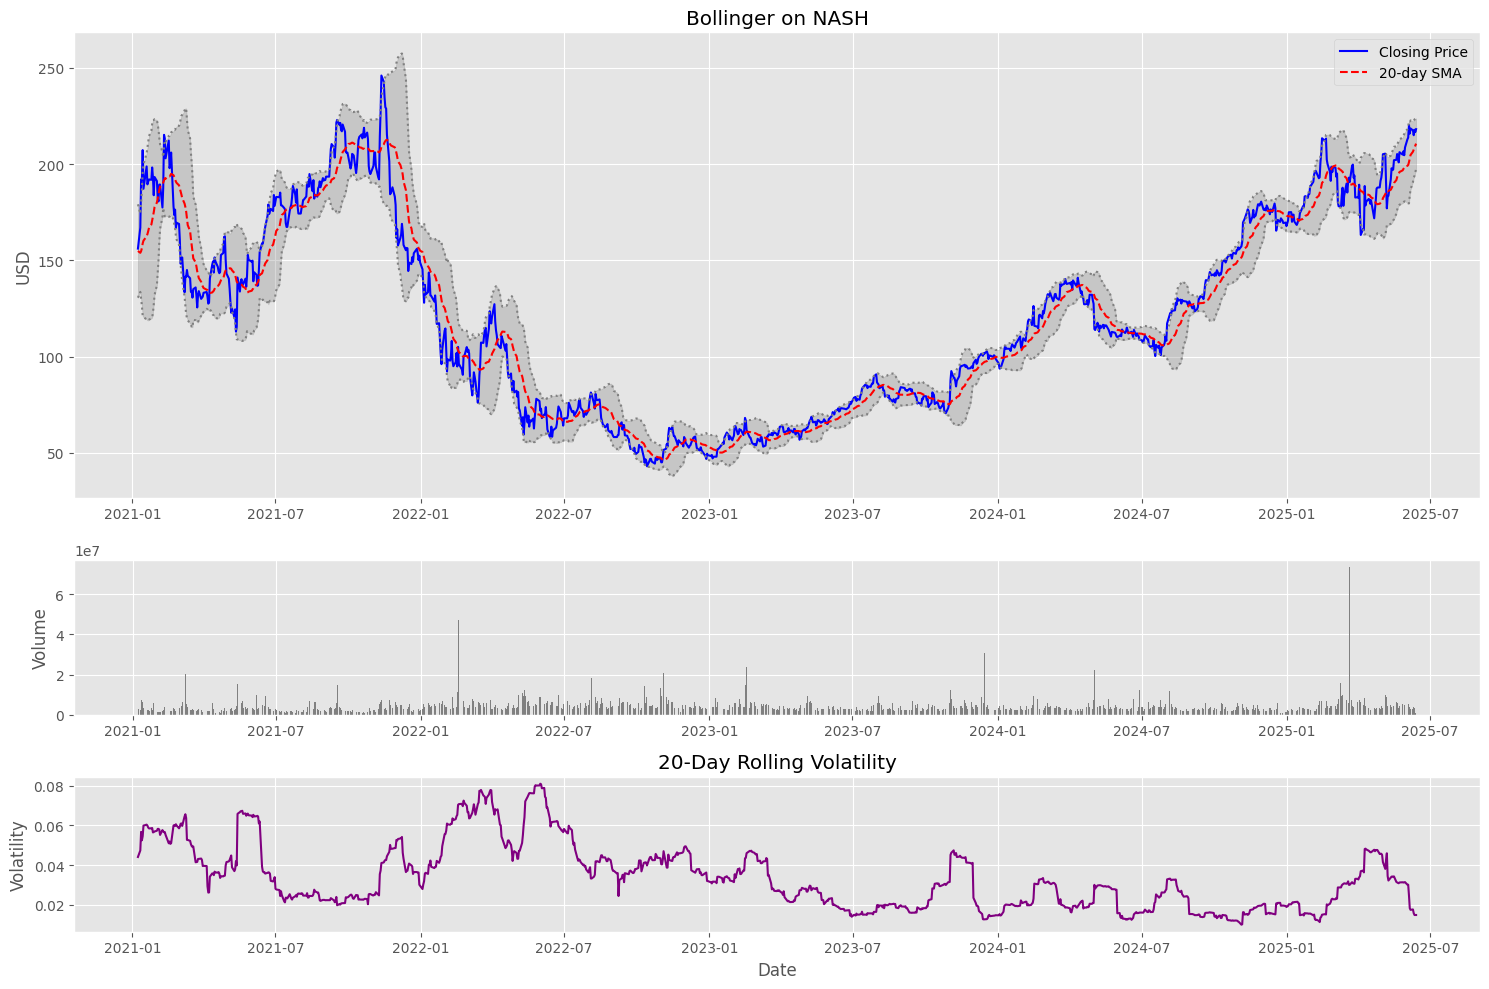

In [505]:
plt.style.use("ggplot")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,10), gridspec_kw={"height_ratios": [3, 1, 1]})
fig.subplots_adjust(hspace=0.3)

ax1.set_title("Bollinger on NASH")
ax1.set_ylabel("USD")
ax1.plot(df.Close, label = "Closing Price", color = "blue")
ax1.plot(df.SMA_20, label="20-day SMA", color = "red", linestyle ="--")
ax1.plot(df.HighBand, color="grey", linestyle =":")
ax1.plot(df.LowBand, color="grey", linestyle =":")
ax1.fill_between(df.index, df.HighBand, df.LowBand, color = "grey", alpha=0.3)
ax1.legend()

ax2.bar(df.index, df["Volume"], label="Volume", color="grey")
ax2.set_ylabel("Volume")

ax3.plot(df.Volatility_20, label="20-day Volatility", color="purple")
ax3.set_ylabel("Volatility")
ax3.set_title('20-Day Rolling Volatility')
ax3.set_xlabel("Date")

plt.tight_layout()

Here we see several intersections between the upper and lower bands, indicating earnings potential. Moreover, we also see an upwards trend following a steep decline starting at the end of the 2021. 

To gauge the distribution of DoorDash's **Logarithmic Returns** we have plotted a histogram. Although a 'fat tail' can be observed, it is minimal.

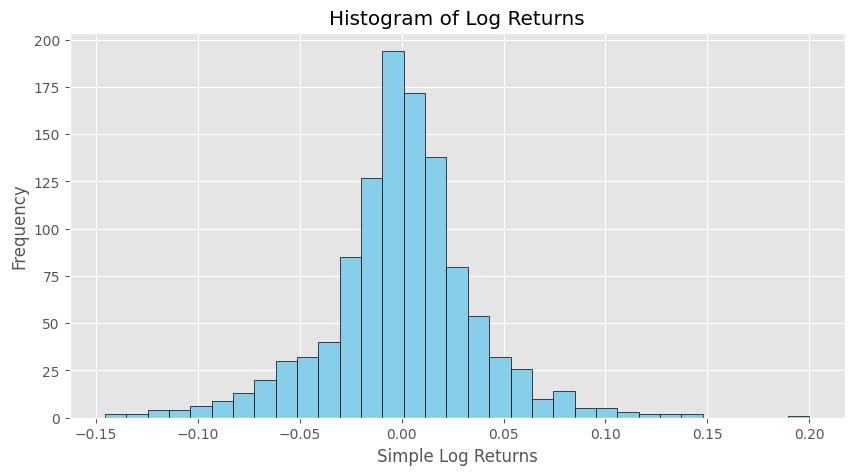

In [506]:
recommended_bins = int(np.sqrt(len(df.LogReturns)))
plt.figure(figsize=(10, 5))
plt.hist(df.LogReturns, bins=recommended_bins, color="skyblue", edgecolor="black")

plt.title("Histogram of Log Returns")
plt.xlabel("Simple Log Returns")
plt.ylabel("Frequency")
plt.show()

Next we investigate the relationship between **Volume** and **Daily Returns** to find a correlation between the two.

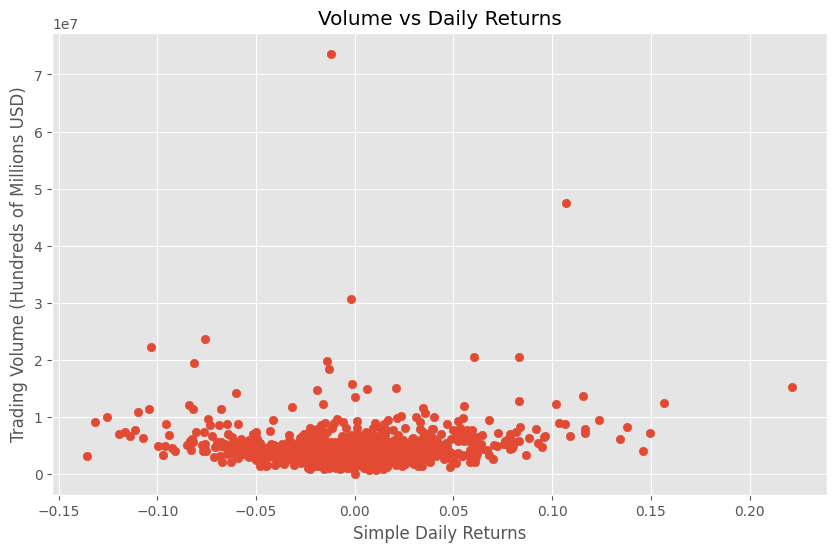

In [507]:
plt.figure(figsize=(10, 6))
plt.scatter(df.DailyReturns, df.Volume)
plt.title("Volume vs Daily Returns")
plt.ylabel("Trading Volume (Hundreds of Millions USD)")
plt.xlabel("Simple Daily Returns")
plt.show()

# Reporting

A: The price movement of DASH falls under the typical technical indicator range (e.g., Bollinger Bands, SMA, volatility, etc.), we find its returns distribution to be relatively stable and its trading volume distribution highly dispersed, which would indicate the potential role of algorithmic trading on the price action of the aforementioned asset instead of the combined action of large market participants.

From these observations, we would advise the firm to invest on a small scale in DASH but with a focus on short-term operations. This is an asset best used for fast entry and exit for the exploitation of short-term opportunities with the stop-loss used to limit risk. If the firm has no intention of undertaking frequent trading or seeking a stable long-term security for an investment, then the DASH is not the best for large-scale long-term holdings.


B: The analysis of DASH’s charts yields key insights. First, the Bollinger Bands, 20-day Simple Moving 
Average (SMA), and volatility metrics indicate that DASH has experienced significant historical price 
fluctuations. Following a downturn, its price has exhibited an upward trend since 2023. Volatility has 
spiked in phases, such as early 2021 and early 2022, and later entered calmer periods. Occasional 
large-volume spikes suggest the presence of impactful market events. The logarithmic returns histogram, centered near zero, implies that most daily gains and losses are small and symmetric, signifying that extreme daily price swings, whether positive or negative, are equally probable or improbable. The volume-versus-returns scatter plot reveals that most trading activity clusters at low volume and small return levels. However, scattered high-volume data points, associated with both positive and negative returns, imply rare yet impactful volume-driven price movements.

For firms contemplating an increase in their DASH stakes, if short-term trading accompanied by active risk management aligns with the firm’s strategy, a modest stake increase is viable. Leverage short-term price movements, such as volume-driven spikes, while implementing strict stop-loss measures to limit downside risks. Conversely, for long-term and stable investment holdings, DASH poses risks. Its historical volatility and uncertain volume-return relationships render it unsuitable for “buy-and-hold” strategies. In summary, DASH is best utilized for tactical, short-term trading initiatives with stringent risk controls. Large-scale, long-term commitments should be avoided unless the firm can tolerate a high degree of uncertainty.


C: According to the Bollinger Bands technical analysis method, DASH has shown strong upward momentum in recent months. The price touches or approaches the upper band frequently, indicating a bullish trend. However, this may also suggest short-term overbought conditions which may drive the price down. Then, we focus on the 20-day SMA: the closing price is higher than the SMA in recent months, indicating an uptrend. Meanwhile, the 20-day rolling volatility shows a decreasing volatility. Hence, a low volatility combined with an upward price trend may suggest a positive signal in the market.  

Therefore, given the analysis above, I would suggest increasing the firm’s stake in DASH in the immediate future. The asset is currently in a healthy uptrend with declining volatility. However, it is better to continuously monitor the price changes and other market signals in order to adjust positions in accordance with our wider suggested strategy of short-term frequent trades.

D: Our analysis shows DoorDash stock has a significant day-to-day volatility, which is shown by the Bollinger Bands and rolling volatility chart. Although the histogram of log returns seems to have a “fat tail”, further testing reveals it has (kurtosis ≤ 3). This suggests the risk of extreme, outlier prices are not abnormally high. The stock currently has an upward trend after a previous major decline. 

While the high volatility still requires a cautious analysis, not having an excessive “fat tail” improves the risk-return balance. Given the strong upward trend, a modest increase in the stock can be justified for portfolios with a moderate to high risk tolerance. I recommend monitoring the position closely due to the inherent volatility. This will be crucial in the successful exexcution of our proposed trading strategy.

E: We recommend a cautious, short-term increase in the firm’s stake in DoorDash based on observed performance trends since its IPO. The stock experienced its highest volatility in 2022 but has shown a consistent decline in volatility and a strong price recovery afterward. The annual closing price increased significantly from $48.82 in 2022 to $218.12 in 2025, with notable trading activity. The largest gains often followed major drops, indicating short-term resilience.

These patterns suggest improving technical stability and present opportunities for short-term tactical positioning. However, given the historical volatility and sensitivity to macroeconomic shifts, DoorDash may not be suitable for long-term strategic holdings. We recommend the firm explore incremental entries aligned with short-term signals, while avoiding long-term accumulation beyond acceptable risk thresholds.

F: DoorDash has established a stabilising bullish trend, following the tumultuous post-Covid years. The market is increasingly responsive to this stock, as evidenced by the smoothing of sharp surges and drops. Synthesising the myriad of information garnered in this report, a clear relationship between technical indicators and key dates can be observed. This relationship portrays increased investor interest, especially over the past year, where daily traded volume peaked at over 70 million shares. Despite this, our data visualisation and key dates show a sustained upward trend throughout the year.

This suggests that investor activity is currently driven less by speculation on extreme price movements, and more by short-term, opportunistic trading strategies centred around a rising moving average.

To fully maximise the firm’s stake in DoorDash, we recommend strengthening the position through disciplined short-term trades — selling near the upper Bollinger Band and repurchasing as the price regresses to the mean. This strategy is supported by liquidity patterns over the past five years. While both positive and negative return spikes have reduced, this reflects a tighter price range, favouring algorithmic trading.

However, due to ongoing volatility and an absence of consistent long-term return signals, DoorDash does not support a stable buy-and-hold strategy. We advise against large-scale, long-term commitments unless the firm’s mandate includes high-risk tolerance.